# Lab Assigment 1 Q&A Candies
<p style="text-align:left;">
    José Pedro Cruz
    <span style="float:right;">
        up201504646
    </span>
</p>
<p style="text-align:left;">
    Martinho Figueiredo
    <span style="float:right;">
        up201506179
    </span>
</p>
<p style="text-align:left;">
    Nuno Nascimento
    <span style="float:right;">
        up201900000
    </span>
</p>

In [1]:
#imports and line magic to make the notebook work

%pip install --upgrade pip
%pip install opencv-python
%pip install matplotlib
%pip install sympy
%pip install pandas
%pip install ipympl



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:

%matplotlib widget

from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
import glob
import sympy
from sympy import * 
import pandas as pd

## Intrinsic calibration

Loading Image data/IntrinsicCalibration/calib_img_0.png


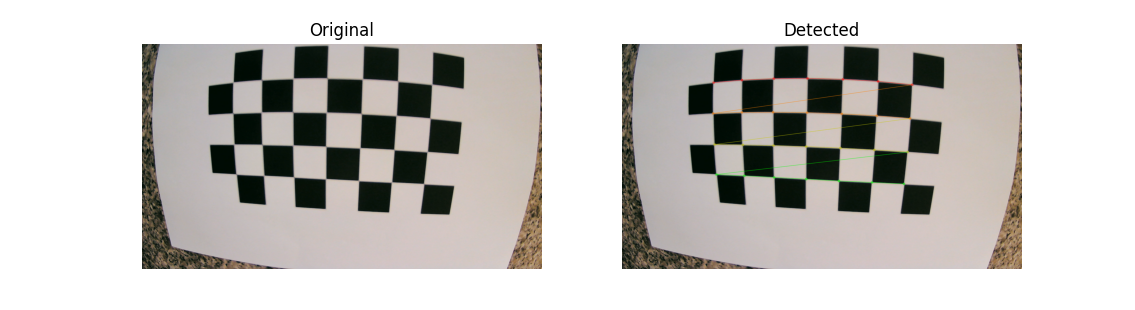

In [32]:
#https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#void%20Rodrigues(InputArray%20src,%20OutputArray%20dst,%20OutputArray%20jacobian)
#https://stackoverflow.com/questions/55220229/extrinsic-matrix-computation-with-opencv

# tuple that says the grid size (note these are interior corners)
grid_size = (7,4) 

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((grid_size[1]*grid_size[0],3), np.float32)
objp[:,:2] = np.mgrid[0:grid_size[0],0:grid_size[1]].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = sorted(glob.glob('data/IntrinsicCalibration/calib_img_0.png'))

for fname in images:

    print(f"Loading Image {fname}")
    img = cv.imread(fname)
    
    plt.subplot(1,2,1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original')
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Find the chess board corners
    ret, corners = cv.findChessboardCornersSB(gray, grid_size, None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        cv.drawChessboardCorners(img, grid_size, corners2, ret)
    plt.subplot(1,2,2)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Detected')
    plt.show()



ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
rmtx, jacobian = cv.Rodrigues(rvecs[0])

In [37]:
print(f" Intrinsic Matrix :")
pprint(sympy.Matrix(mtx).evalf(3))
print(f" Distorcion Coefficients :")
pprint(sympy.Matrix(dist).evalf(3))
print(f"\n Rotation Vector : ")
pprint(sympy.Matrix(rvecs[0]).evalf(3))
print(f"\n Rotation Matrix (from cv.Rodrigues): ")
pprint(sympy.Matrix(rmtx).evalf(3))
print(f"\n Translation Matrix : ")
pprint(sympy.Matrix(tvecs[0]).evalf(3))


 Intrinsic Matrix :
⎡1.03e+3     0     1.04e+3⎤
⎢                         ⎥
⎢   0     1.04e+3   529.0 ⎥
⎢                         ⎥
⎣   0        0       1.0  ⎦
 Distorcion Coefficients :
[-0.247  0.191  0.0223  -0.00755  -0.165]

 Rotation Vector : 
⎡0.241 ⎤
⎢      ⎥
⎢0.0421⎥
⎢      ⎥
⎣0.0432⎦

 Rotation Matrix (from cv.Rodrigues): 
⎡ 0.998   -0.0377  0.0469⎤
⎢                        ⎥
⎢0.0478    0.97    -0.238⎥
⎢                        ⎥
⎣-0.0365   0.24     0.97 ⎦

 Translation Matrix : 
⎡-3.85⎤
⎢     ⎥
⎢-2.31⎥
⎢     ⎥
⎣5.92 ⎦


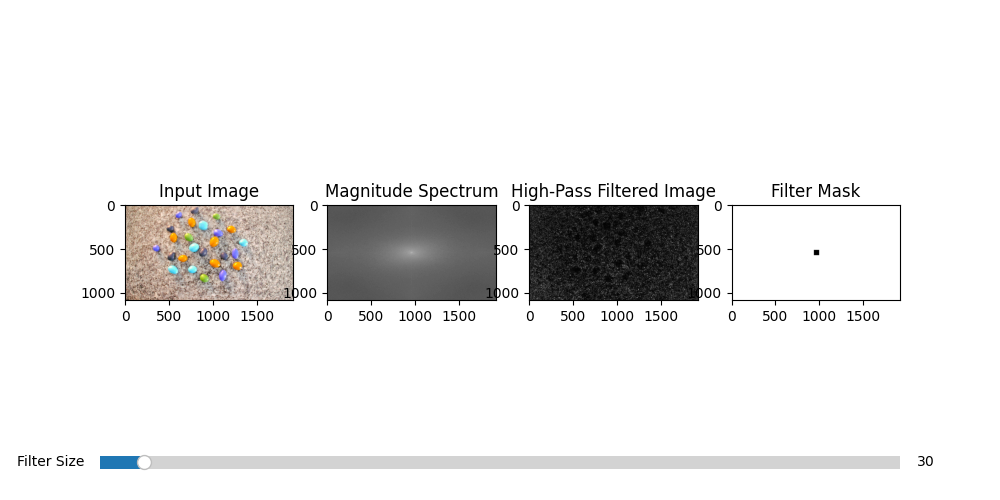

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider

%matplotlib widget

def frequency_filter(image):
    # Convert image to grayscale
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Fourier transform
    f = np.fft.fft2(img)

    # Shift origin to center
    fshift = np.fft.fftshift(f)

    # Magnitude spectrum
    magnitude_spectrum = 20*np.log(np.abs(fshift))

    # Create figure with subplots
    fig, axs = plt.subplots(1, 4, figsize=(10, 5))

    # Plot input image
    axs[0].imshow(image)
    axs[0].set_title('Input Image')

    # Plot magnitude spectrum
    axs[1].imshow(magnitude_spectrum, cmap='gray')
    axs[1].set_title('Magnitude Spectrum')

    # Plot high-pass filtered image
    img_filtered = apply_filter(fshift, img.shape, 30)
    axs[2].imshow(img_filtered, cmap='gray')
    axs[2].set_title('High-Pass Filtered Image')

    # Plot filter mask
    mask = create_mask(img.shape, 30)
    axs[3].imshow(mask, cmap='gray')
    axs[3].set_title('Filter Mask')

    # Add slider for filter size
    slider_ax = fig.add_axes([0.1, 0.05, 0.8, 0.05])
    slider = Slider(slider_ax, 'Filter Size', valmin=0, valmax=min(img.shape)//2, valinit=30)

    # Update plot when slider is changed
    def update(val):
        # Update filter size
        filter_size = int(slider.val)

        # Update high-pass filtered image and filter mask
        img_filtered = apply_filter(fshift, img.shape, filter_size)
        mask = create_mask(img.shape, filter_size)

        # Update plot
        axs[2].imshow(img_filtered, cmap='gray')
        axs[3].imshow(mask, cmap='gray')
        plt.draw()

    # Connect slider to update function
    slider.on_changed(update)

    # Show plot
    plt.show()

def apply_filter(fshift, shape, filter_size):
    # High pass filter
    rows, cols = shape
    crow, ccol = rows//2, cols//2
    mask = create_mask(shape, filter_size)

    # Apply mask
    fshift_filtered = fshift * mask

    # Shift origin back to corner
    f_filtered = np.fft.ifftshift(fshift_filtered)

    # Inverse Fourier transform
    img_filtered = np.fft.ifft2(f_filtered)
    img_filtered = np.abs(img_filtered)

    return img_filtered

def create_mask(shape, filter_size):
    rows, cols = shape
    crow, ccol = rows//2, cols//2
    mask = np.ones((rows, cols), np.uint8)
    mask[crow-filter_size:crow+filter_size, ccol-filter_size:ccol+filter_size] = 0
    return mask


img = cv2.imread('data/GreyBackground/calib_img_4.png')
frequency_filter(img)
